<a href="https://colab.research.google.com/github/joseflix/DocenciaUAB/blob/master/MN1/2022_2023/Practiques/20230615_2oParcial_Soluciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MN1: 2º parcial (programación) 15/06/2023**

<hr>

**Nombre:**

**NIU:**

**mail (gmail):**

<hr>

**Instrucciones de edición del Notebook y entrega**

*   Abre el Notebook desde GitHub ("Open in Colab") y genera una copia en tu Drive ("Guardar una copia en Drive"). Edita esa copia para el examen.
*   Renombra esa copia como usando tu NIU como nombre de archivo: "NIU.ipynb" (*por ejemplo, 2055007.ipynb*)
*   Rellena tu nombre, NIU i mail (gmail, si quieres recibir los comentarios/feedback acerca de tu examen) en la cabecera de este Notebook.
*   Al final del examen, descarga este cuaderno en formato .ipynb y lo tienes que subir al siguiente *drop folder*: [Link](https://cern.ch/examendf2023). Asegurate de que el fichero tiene el nombre correcto.
*   Podéis volver a subir el fichero si creéis que hay un error pero sólo consideraremos la última versión, y dentro del horario establecido.
*   **NOTA** Antes de entregar o dar por finalizado cada ejercicio, es recomendable reiniciar el entorno de ejecución para ver que se ejecuta todo de forma correcta: "Entorno de ejecución >> Reiniciar entorno de ejecución",y luego "Entorno de ejecución >> Ejecutar todas".

<hr>

**Instrucciones del examen**

*   El examen se realiza de forma individual.
*   El horario es de 9h a 12h. No se aceptarán entregas pasada esa hora.
*   Podéis consultar apuntes, entregas o usar internet para buscar información, pero **NO** comunicaros entre vosotros/as, ni usar ChatGPT, ni Whatsapp, ni mensajería... Revisaremos durante el examen que no tengáis ventanas abiertas con estas aplicaciones.

<hr>

## **EXAMEN**

In [ ]:
# Ejecuta esta parte de código para importar librerías comunes (añade las que creas necesarias a esta lista)

#import random
import numpy as np
import matplotlib.pyplot as plt
#import scipy.stats as ss
import math
#from matplotlib import ticker, cm
#from collections import Counter

<font color='green'>**> Ejercicio #1 [4 puntos]**</font>

En este ejercicio se trata de calcular el área sombreada de la figura que se muestra a continuación, usando un método de MonteCarlo:

<img src="https://raw.githubusercontent.com/joseflix/DocenciaUAB/master/MN1/2022_2023/fig3.png" width=600 height=500 />

Por un lado tenemos la función $f_1=sin(x)$ entre 0 y $\pi$, y por otro lado otra función $f_2$ que consta de dos rectas: una que va de (0,1) a ($\pi/2$,0), y otra recta que va de ($\pi/2$,0) a ($\pi$,1). Se trata de calcular el área sombreada.

**1.1 [1 punto]:** Define dos funciones que evalúen $f_1$ y $f_2$ para cualquier valor de x comprendido entre 0 y $\pi$. Imprime por pantalla el valor de las funciones para x=$\pi/4.$.

In [ ]:
def f1(x):
  return np.sin(x)

def f2(x):
  if (x < np.pi/2.):
    y=1-x/(np.pi/2.)
  if (x == np.pi/2.):
    y=0
  if (x > np.pi/2.):
    y=(x-np.pi/2.)/(np.pi/2.)
  return y

print("f1(pi/4) = ", f1(np.pi/4.))
print("f2(pi/4) = ", f2(np.pi/4.))

f1(pi/4) =  0.7071067811865475
f2(pi/4) =  0.5


**1.2 [1 punto]:** Dibuja las dos funciones $f_1$ y $f_2$ en el intervalo de x entre 0 y $\pi$, en la misma gráfica.


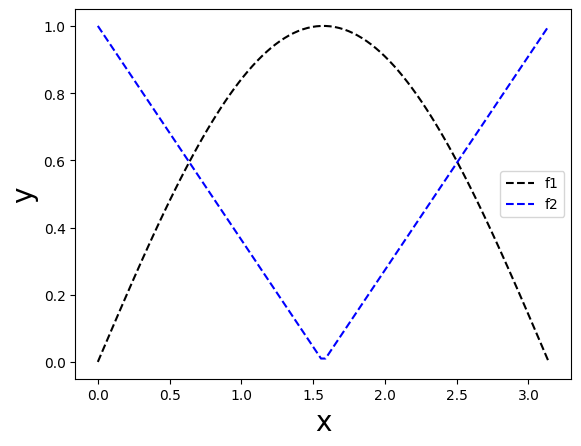

In [ ]:
x=np.linspace(0,math.pi,100)
y1=np.sin(x)

y2=[]
for i in x:
  y2.append(f2(i))

plt.plot(x,y1,'k--', label="f1")
plt.plot(x,y2,'b--', label="f2")
plt.ylabel("y", fontsize=20)
plt.xlabel("x", fontsize=20)
plt.legend(loc='best')
plt.show()

**1.3 [2 puntos]:** Usa un método de MonteCarlo con $N=10^5$ puntos de prueba. Realiza una gráfica que muestre las funciones, los puntos que caen dentro del área a integrar (en verde) y fuera del área (en rojo). Calcula el área que se pide y muestra el valor por pantalla.


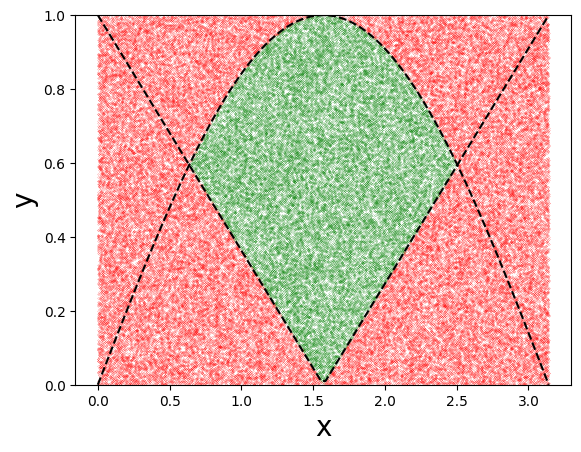

MC integration : 1.0610100868968808


In [ ]:
y_min = 0.
y_max = 1.

N = int(1e5)
x_tries = np.random.uniform(0,math.pi,N)
y_tries = np.random.uniform(y_min,y_max,N)

x_valid=[]
y_valid=[]
x_novalid=[]
y_novalid=[]

for j in range(0,N):
  if y_tries[j] <= f1(x_tries[j]) and y_tries[j] >= f2(x_tries[j]):
    x_valid.append(x_tries[j])
    y_valid.append(y_tries[j])
  else:
    x_novalid.append(x_tries[j])
    y_novalid.append(y_tries[j])

plt.ylim(y_min,y_max)
plt.plot(x_valid,y_valid,'g.',markersize=0.25)
plt.plot(x_novalid,y_novalid,'r.',markersize=0.25)
plt.ylabel("y", fontsize=20)
plt.xlabel("x", fontsize=20)
plt.plot(x,y1,'k--')
y2=[]
for i in x:
  y2.append(f2(i))
plt.plot(x,y2,'k--')
plt.show()

print("MC integration : {}".format((np.pi*(y_max-y_min))*len(x_valid)/N))

<font color='green'>**> Ejercicio #2 [3 puntos]**</font>

Tenemos 4 barajas de 52 cartas (cada una de ella con 4 palos de 13 cartas). Tiramos todas esas cartas al aire, y vamos a calcular la probabilidad de que veamos diferentes grupos de cartas del número 2 mirando hacia arriba, una vez en el suelo, independientemente del palo que sean. Es decir vamos a calcular la probabilidad de que haya cero cartas del 2 hacia arriba, una carta del 2 mirando hacia arriba, dos cartas del 2 hacia arriba,... y así hasta el número máximo de posibilidades que tenemos (16 cartas del 2 hacia arriba).

Para calcular una probabilidad de este tipo podemos usar la definición frecuentista, en la que para un número $N$ de realizaciones del experimento se calcula la probabilidad como:

$$
P(A) = \frac{\text{# de veces que ha ocurrido A}}{N}
$$

que tiende al valor real si $N \to \infty$.

>**Nota** Para modelizar este escenario tendrás que utilizar herramientas de generación y manipulación de listas. Puedes usar $x=np.array([1,2,...])$ para generar una baraja, y la función $np.repeat(x,4)$ para obtener 4 barajas. Para decidir si una carta mira arriba/abajo puedes generar una lista de números random entre 0 y 1 (si un número es > 0.5 mira hacia arriba, por ejemplo), y usar Fancy Indexing para hacer que las cosas sean más rápidas (link: https://python-course.eu/numerical-programming/numpy-boolean-indexing.php). Para contar el número de ocurrencias, existe la función *np.count_nonzero(R == 2)* o bien aplicar count a una lista como *R.count(2)*, dependiendo si usas listas de numpy o no... Más pistas no se pueden dar! ;)

**2.1 [1 punto]:** Define una función que no recibe ningún argumento. Simplemente asume las 4 barajas, las 'tira' al aire y nos devuelve el número de ocurrecias de la carta 2 mirando hacia arriba, cada vez que la ejecutamos. Es decir:


```
def getocurrences():
  --> Tu código

print(getoccurrences())
--> imprime las ocurrencias de tener cartas del número 2 mirando hacia arriba
```



In [ ]:
x=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13])
c=np.repeat(x,4*4)

def getocurrences():
  rn=np.random.uniform(0,1,4*4*13)
  R = c[rn>.5]
  return np.count_nonzero(R == 2)

In [ ]:
# Alternativament, el que passa amb la resta de cartes és irrellevant. Una funció basada en 16 randoms > 0.5 ja sería suficient!

def getocurrences2():
  rn=np.random.uniform(0,1,16)
  return sum(i > .5 for i in rn)

**2.2 [2 puntos]:** Realiza $10^6$ tiradas y haz una gráfica de la probabilidad de obtener cada uno de los casos propuestos de ocurrencias (en porcentaje, respecto del total de tiradas). Imprime por pantalla en qué número de ocurrencias encuentras el máximo, y con qué probabilidad se da.

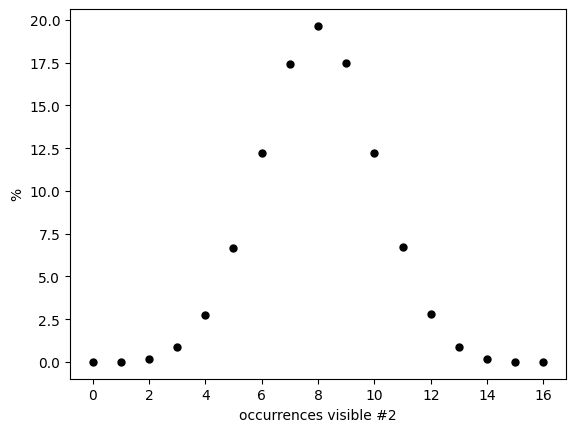

La probabilidad más alta es ver 8 cartas hacia arriba del número 2, con un valor de 19.6471 %.


In [ ]:
oc=[]

N=int(1e6)
for i in range(0,N):
  oc.append(getocurrences())

oc_x = []
oc_y = []

for i in range(0,16+1):
  oc_x.append(i)
  oc_y.append(100.*oc.count(i)/N)

plt.plot(oc_x,oc_y,'k.', markersize=10)
#plt.yscale('log')
plt.ylabel("%")
plt.xlabel("occurrences visible #2")
plt.show()

oc_max=oc_x[oc_y.index(np.max(oc_y))]
print("La probabilidad más alta es ver", oc_max, "cartas hacia arriba del número 2, con un valor de", np.max(oc_y), "%.")

<font color='green'>**> Ejercicio #3 [3 puntos]**</font>

Tenemos una caja de 30 cm de ancho por 950 cm de largo. En la parte derecha tenemos un pequeño orificio de 4 cm, centrado en la caja. Tenemos una partícula que sale del centro de la parte izquierda, y que va a realizar un movimiento errático hacia la derecha. Consideraremos la partícula como una una partícula puntual. Mostramos una figura explicativa del problema (los 4 movimientos realizados no están a escala!).

<img src="https://raw.githubusercontent.com/joseflix/DocenciaUAB/master/MN1/2022_2023/fig1.png" width=600 height=500 />

Cada 10 ms la partícula realiza un movimiento hacia la derecha. La distancia recorrida va a tomar un valor aleatorio entre 0 cm y 1 cm, con un ángulo respecto al eje x resultante de un valor aleatório entre -35$^o$ y 35$^o$. Vamos a seguir la trayectoria de la partícula en 20 segundos (es decir 2000 pasos). Tenemos 4 casos diferenciados: la partícula o bien puede chocar con las paredes de arriba/abajo, o con la pared de la derecha, salir por el orificio, o bien quedarse dentro de la caja, sin haber chocado con nada ni haber salido por el orificio.

**3.1 [0.5 puntos]:** Define una función en la que dada una posición $(x_i,y_i)$ inicial de la partícula, nos devuelva la posición $(x_{i+1},y_{i+1})$ después de haber realizado un paso. Tomando la partícula en el orígen (0,0) imprime por pantalla donde se encontraría la partícula después del primer paso.

In [ ]:
dmaxcm=1
amaxdeg=35

def getnextpos(x,y):
  v=np.random.uniform(0,dmaxcm)
  a=np.random.uniform(-math.radians(amaxdeg),math.radians(amaxdeg))
  return [x+v*math.cos(a),y+v*math.sin(a)]

x_i=0
y_i=0

print("En el primer paso, la partícula se encuentra en (x,y)=",getnextpos(0.,0.))

En el primer paso, la partícula se encuentra en (x,y)= [0.7806500448793705, 0.36409567801719606]


**3.2 [1.5 puntos]:** Realiza múltiples trayectorias de 20 segundos (que corresponden a 2000 pasos) de esta partícula, y muestra en una única gráfica las 4 posibilidades que pueden suceder, es decir, intenta replicar una gráfica similar a esta:

<img src="https://raw.githubusercontent.com/joseflix/DocenciaUAB/master/MN1/2022_2023/fig2.png" width=600 height=500 />

Una vez la partícula choca o sale de la caja, hay que parar la simulación (es decir, que no haréis los 2000 pasos). En el caso que quede confinada, si que habréis hecho los 2000 pasos y la partícula ni choca, ni sale.

Os facilitamos el código para dibujar la 'caja':

```
maxy=15
maxx=950
window=2

plt.vlines(x = 0, ymin = -maxy, ymax = maxy, colors = 'black', linewidth=1)
plt.vlines(x = maxx, ymin = window, ymax = maxy, colors = 'black', linewidth=1)
plt.vlines(x = maxx, ymin = -window, ymax = -maxy, colors = 'black', linewidth=1)
plt.hlines(y = maxy, xmin = 0, xmax = maxx, colors = 'black', linewidth=1)
plt.hlines(y = -maxy, xmin = 0, xmax = maxx, colors = 'black', linewidth=1)
plt.xlim(-100,1000)
plt.ylim(-1.1*maxy,1.1*maxy)
plt.xlabel("x")
plt.ylabel("y")
plt.show()
```



946.8897746361502 -12.004322711146145 orange
950.1754860747293 7.9670726843478805 violet
956.8070440516217 -1.961424997282778 green
253.04883000344773 -15.102333858500334 red


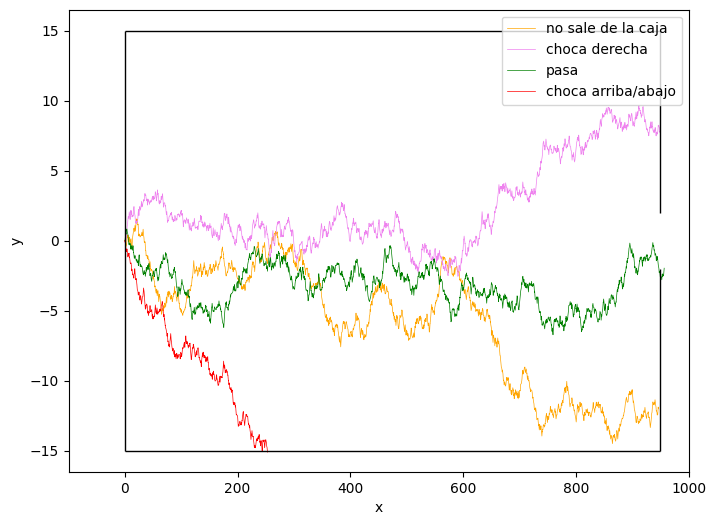

In [ ]:
N=2000

maxy=15
maxx=950
window=2

plt.figure(figsize=(8,6))

MissPlot = True
a1 = True
a2 = True
a3 = True
a4 = True

while (MissPlot):
  c='green'
  x = [0]
  y = [0]
  for i in range(0,N):
    d=getnextpos(x[-1],y[-1])
    x.append(d[0])
    y.append(d[1])
    if (np.abs(y[-1]) > maxy) and (x[-1]<=maxx) and a1:
      c='red'
      print(x[-1],y[-1], 'red')
      a1=False
      plt.plot(x,y,color=c,linestyle='-',linewidth=0.5,label="choca arriba/abajo")
      break
    if (np.abs(y[-1]) > window) and (x[-1]>maxx) and a4:
      c='violet'
      print(x[-1],y[-1], 'violet')
      a4=False
      plt.plot(x,y,color=c,linestyle='-',linewidth=0.5,label="choca derecha")
      break
    if (np.abs(y[-1]) <= window) and (x[-1]>maxx) and a2:
      c='green'
      print(x[-1],y[-1], 'green')
      a2=False
      plt.plot(x,y,color=c,linestyle='-',linewidth=0.5,label="pasa")
      break
  if x[-1] < maxx and c!='red' and c!='violet' and a3:
    print(x[-1],y[-1], 'orange')
    a3=False
    c='orange'
    plt.plot(x,y,color=c,linestyle='-',linewidth=0.5,label="no sale de la caja")
  if (a1 != True and a2 != True and a3 != True and a4 != True):
    MissPlot=False

plt.vlines(x = 0, ymin = -maxy, ymax = maxy, colors = 'black', linewidth=1)
plt.vlines(x = maxx, ymin = window, ymax = maxy, colors = 'black', linewidth=1)
plt.vlines(x = maxx, ymin = -window, ymax = -maxy, colors = 'black', linewidth=1)
plt.hlines(y = maxy, xmin = 0, xmax = maxx, colors = 'black', linewidth=1)
plt.hlines(y = -maxy, xmin = 0, xmax = maxx, colors = 'black', linewidth=1)
plt.xlim(-100,1000)
plt.ylim(-1.1*maxy,1.1*maxy)
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc='best')
plt.show()

**3.3 [0.5 puntos]:** Realiza 1000 trayectorias y haz una gráfica de barras ($plt.bar$) con el porcentaje de trayectorias que: a) han chocado con cualquier pared, b) han quedado confinadas en la caja, y c) han pasado por el agujero.

Total trayectorias: 1000 ; 31 pasan,  291 chocan y  678 quedan confinadas.
En porcentaje:  3.1 % 29.1 % 67.8 %


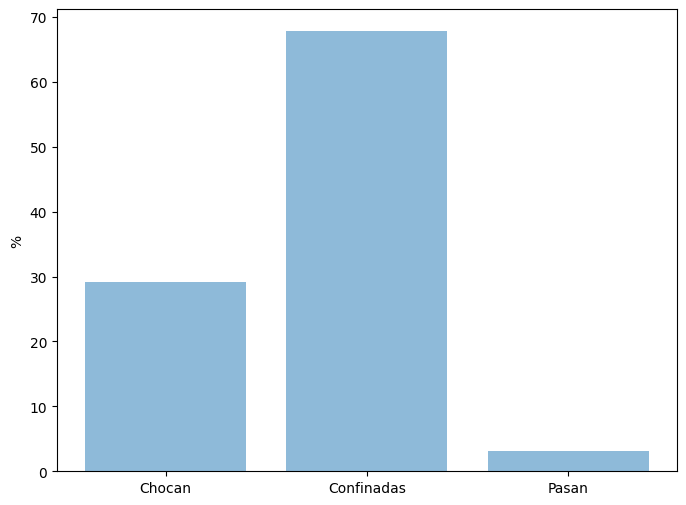

In [ ]:
M=1000

passa=0
xoca=0
confinada=0

for j in range(0,M):
  x = [0]
  y = [0]
  for i in range(0,N):
    d=getnextpos(x[-1],y[-1])
    x.append(d[0])
    y.append(d[1])
    if x[-1]<=maxx and np.abs(y[-1])>=maxy:
      xoca+=1
      break
    if (np.abs(y[-1])>=window) and (x[-1]>=maxx):
      xoca+=1
      break
    if x[-1]>=maxx and y[-1]<window:
      passa+=1
      break
  if x[-1]<maxx and np.abs(y[-1])<maxy:
    confinada+=1
suma=passa+xoca+confinada
print("Total trayectorias:", suma, ";", passa, "pasan, ",xoca, "chocan y ", confinada, "quedan confinadas.")
print("En porcentaje: ", 100.*passa/suma, "%", 100.*xoca/suma, "%", 100.*confinada/suma, "%")

bpy = []
bpy.append(100.*xoca/suma)
bpy.append(100.*confinada/suma)
bpy.append(100.*passa/suma)
bpx = ['Chocan','Confinadas', 'Pasan']

plt.figure(figsize=(8,6))
plt.bar(bpx,bpy,alpha=0.5)
plt.ylabel("%")
plt.show()

**3.4 [0.5 puntos]:** Calcula otras 1000 trayectorias y muestra en una única gráfica 3 histogramas de las velocidades promedio en el eje x ($\bar{v}_x$, en cm/s) de las trayectorias para cada uno de los casos tratados, es decir un histograma para las que chocan, otro para las confinadas y otro para las que pasan. Dibuja los histogramas normalizados, con el mismo rango de velocidades en el eje x y el mismo número de bins ($range=[40,50]$,$bins=50$).

24 285 691


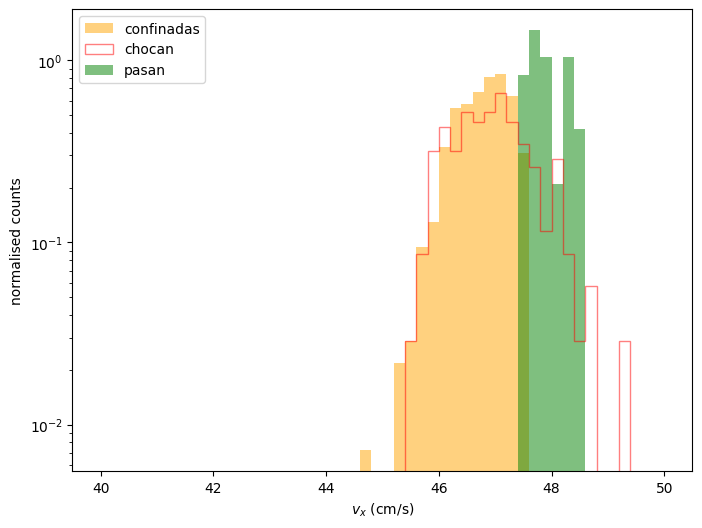

In [ ]:
M=1000

vp_passa=[]
vp_xoca=[]
vp_confinada=[]

deltaT=10*1e-3

for j in range(0,M):
  x = [0]
  y = [0]
  for i in range(0,N):
    d=getnextpos(x[-1],y[-1])
    x.append(d[0])
    y.append(d[1])
    if x[-1]<=maxx and np.abs(y[-1])>=maxy:
      vp_xoca.append(x[-1]/(deltaT*(i+1)))
      break
    if (np.abs(y[-1])>=window) and (x[-1]>=maxx):
      vp_xoca.append(x[-1]/(i+1))
      break
    if x[-1]>=maxx and y[-1]<window:
      vp_passa.append(x[-1]/(deltaT*(i+1)))
      break
  if x[-1]<maxx and np.abs(y[-1])<maxy:
    vp_confinada.append(x[-1]/(deltaT*(i+1)))

print(len(vp_passa), len(vp_xoca), len(vp_confinada))

plt.figure(figsize=(8,6))
plt.hist(vp_confinada,range=[40,50],bins=50,density=True,alpha=0.5, color='orange', label='confinadas')
plt.hist(vp_xoca,range=[40,50],bins=50,density=True,alpha=0.5,color='red', label='chocan',histtype='step')
plt.hist(vp_passa,range=[40,50],bins=50,density=True,alpha=0.5,color='green', label='pasan')
plt.legend(loc='best')
plt.yscale('log')
plt.ylabel("normalised counts")
plt.xlabel(r'$v_x$ (cm/s)')
plt.show()
